In [1]:
%matplotlib inline
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data

import scipy
from scipy.ndimage import measurements
from skimage import data

# Implementation

In [2]:
def hough_lines(img):
    
    #define the theta ranges
    thetas = np.linspace(-np.pi / 2, np.pi / 2, 180)
    #Create the theta's sin and cos
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    
    #Get the shape of image
    width, height = img.shape
    #calculate the max distance of the image which is actually the diagonal of the image
    max_distance = 2 * (round(math.sqrt(width * width + height * height)))
    #The accumulator to store the votes (Hough Space)
    acc = np.zeros((max_distance, thetas.shape[0]), dtype=np.uint64)
    #define the rho ranges
    rhos = np.linspace(-max_distance / 2.0, max_distance / 2.0, max_distance)  
    #define an offset
    offset = max_distance / 2
    #(row, col) indexs to edges
    y_index, x_index = np.nonzero(img)
      
    
    #Vote and store in the accumulator array
    for i in range(len(x_index)):
        x = x_index[i]
        y = y_index[i]       
        #In order to get a positive index, we add an offset which defined above
        for theta_index in range(len(thetas)):
            rho = int(offset + round(x * cos_t[theta_index] + y * sin_t[theta_index]))
            acc[rho, theta_index] += 1
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + acc),
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]],
        cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(acc, thetas, rhos)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    plt.show()
    return

# Test on a simple line

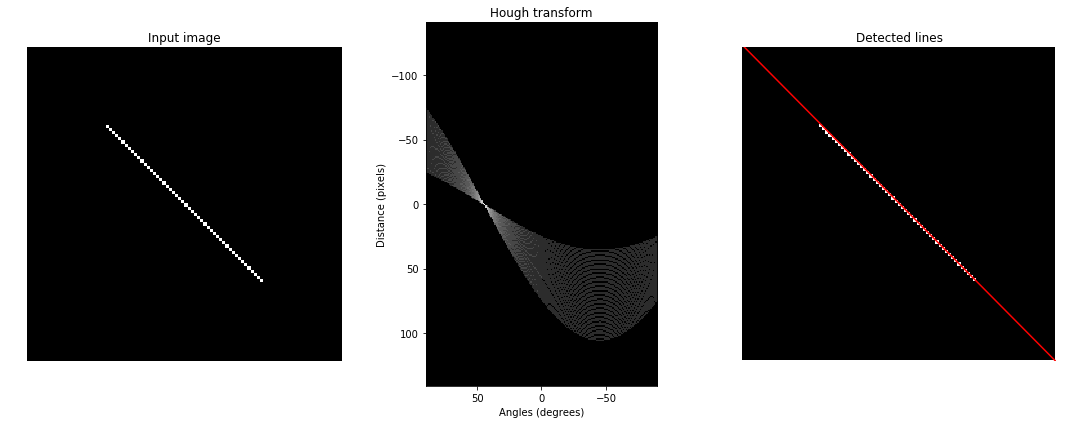

In [3]:
import numpy as np
from skimage.transform import hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm
# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx, idx] = 255

# Classic straight-line Hough transform
hough_lines(image)

# Test on check board image

We read the check board from data. It is 2D gray scale image, and we need pass it into a canny filter then pass into our hough line method.

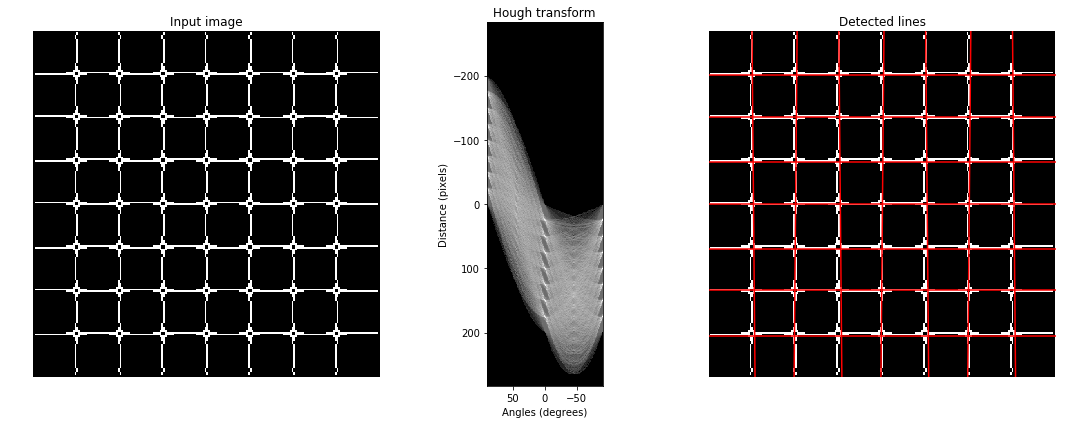

In [4]:
img = data.checkerboard()
image = canny(img)
hough_lines(image)

## Test on camera image from data

This is the more complicated image which we don't usually use hough_transform to detect the lines. We use probabilistic_hough_line instead, but we can also take a look on the output.

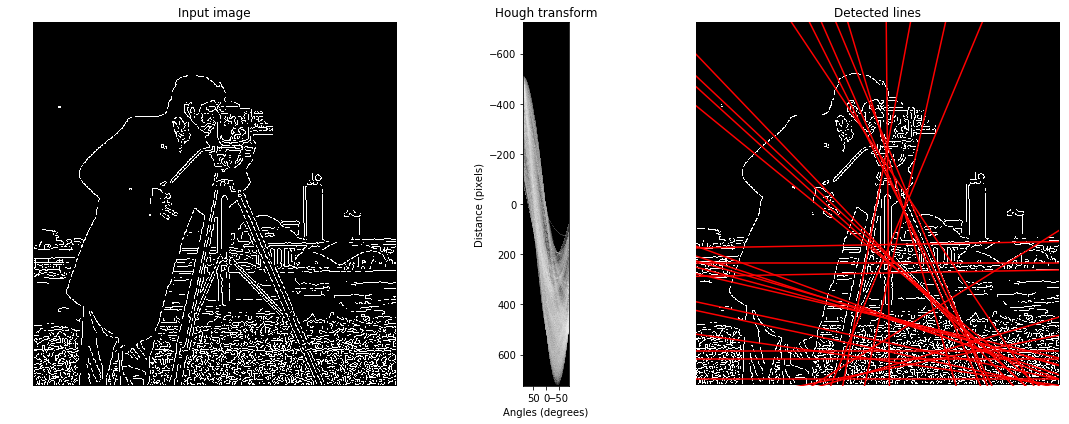

In [5]:
img = data.camera()
image = canny(img)
hough_lines(image)

# Result analysis

We can compare our method to the hough_line method in skimage package

In [6]:
from skimage.transform import hough_line

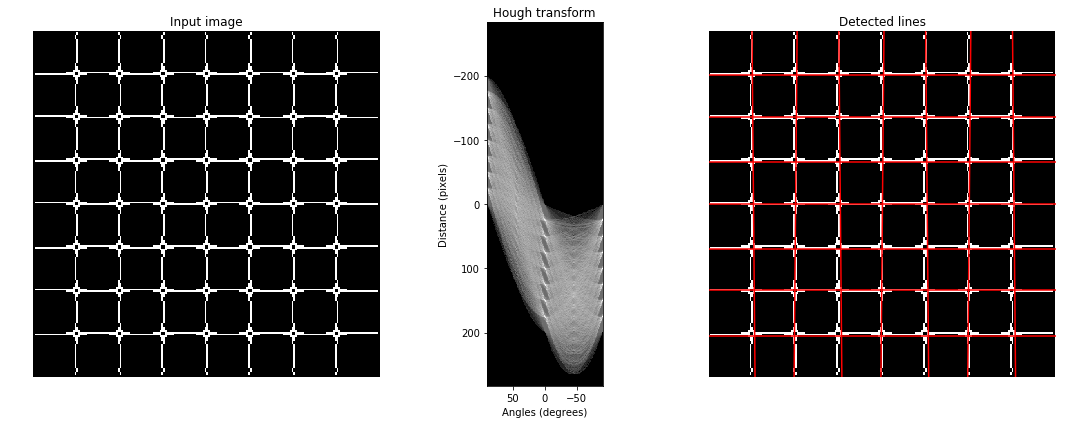

In [7]:
img = data.checkerboard()
image = canny(img)
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

